In [1]:
from models.HAPDModel import HAPDModel
#Auto reload
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from models.DeterministicModel import DeterministicModel
from models.DeterministicModelBalancing import DeterministicModelBalancing
from models.HindsightModel import HindsightModel
from utils.constants import *
from utils.models import *

In [ ]:
# Compute and save the results for Det, HAPD and Hindsight models for 2022-2023 with all adjustments
# generate_all_results_22_23_models()

Model Deterministic_model_22_23_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Results loaded successfully.
Model Deterministic_model_22_23_hmin100_balancing_lag_0
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin100_balancing_lag_1
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin100_balancing_lag_2
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin100_balancing_lag_3
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin100_balancing_lag_4
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_h

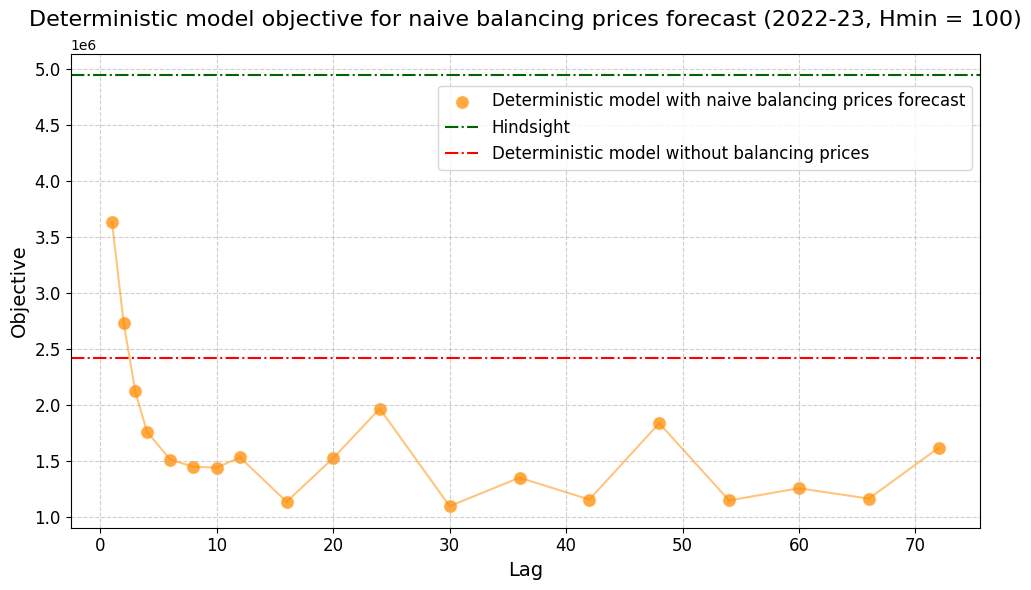

Model Deterministic_model_22_23_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Results loaded successfully.
Model Deterministic_model_22_23_hmin150_balancing_lag_0
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin150_balancing_lag_1
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin150_balancing_lag_2
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin150_balancing_lag_3
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin150_balancing_lag_4
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_h

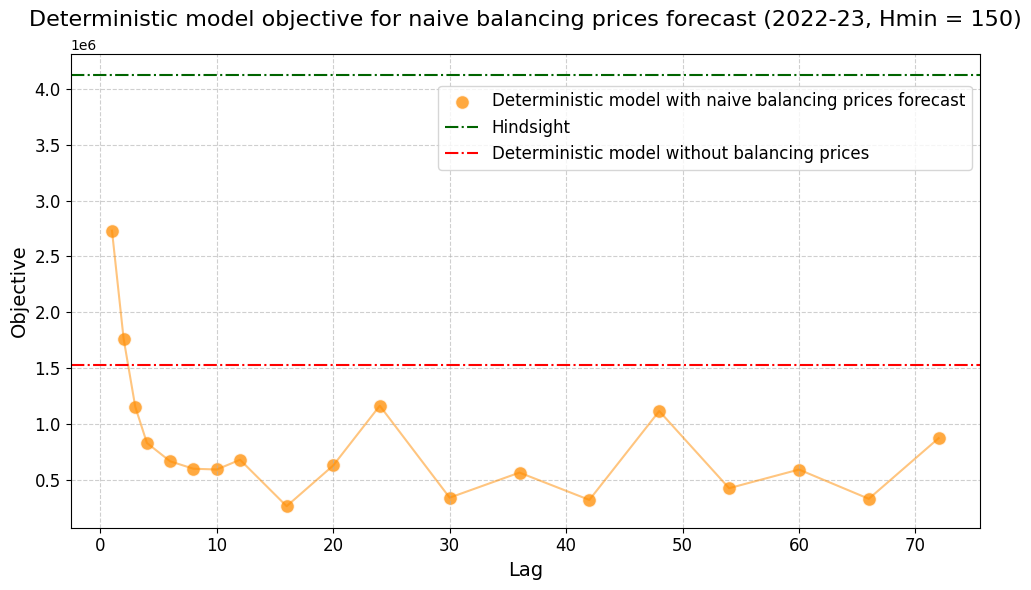

Model Deterministic_model_22_23_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Model Deterministic_model_22_23_hmin200_balancing_lag_0
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin200_balancing_lag_1
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin200_balancing_lag_2
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin200_balancing_lag_3
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_hmin200_balancing_lag_4
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_model_22_23_h

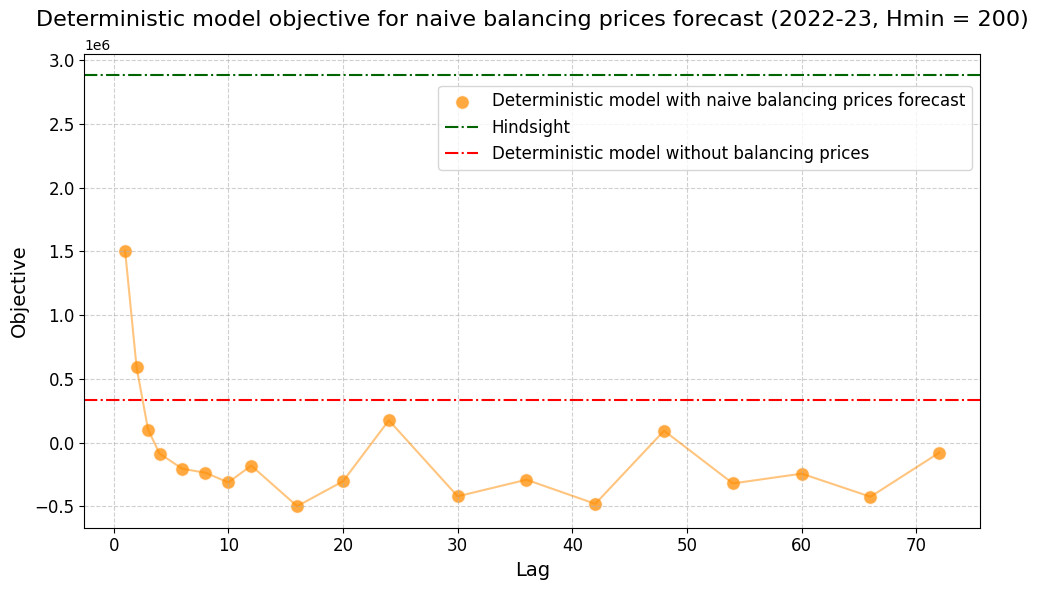

In [16]:
lags = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 30, 36, 42, 48, 54, 60, 66, 72]
for h_min in [100, 150, 200]:    

    objectives = []
    
    default_deterministic_model = DeterministicModel.load('Deterministic_model_22_23_hmin{}'.format(h_min),DeterministicModel)
    results = default_deterministic_model.load_results(ORIGINAL)
    default_objective = results.get_total_objective()
    
    for lag in lags:
        deterministic_model = DeterministicModelBalancing('Deterministic_model_22_23_hmin{}_balancing_lag_{}'.format(h_min,lag), HOURS_PER_YEAR, lag, datafile='../data/2022_2023/2022_2023_data.csv',h_min=h_min)
        results = deterministic_model.evaluate(HOURS_PER_YEAR)
        objectives.append(results.get_total_objective())
        
    plt.figure(figsize=(10, 6))
    plt.scatter(lags[1:], objectives[1:], color='darkorange', edgecolors='w', s=100, alpha=0.75, label='Deterministic model with naive balancing prices forecast')
    plt.plot(lags[1:], objectives[1:], linestyle='-', color='darkorange', alpha=0.5)
    plt.axhline(y=objectives[0], color='darkgreen', linestyle='-.', label='Hindsight')
    plt.axhline(y=default_objective, color='red', linestyle='-.', label='Deterministic model without balancing prices')
    plt.xlabel('Lag', fontsize=14)
    plt.ylabel('Objective', fontsize=14)
    plt.title(f'Deterministic model objective for naive balancing prices forecast (2022-23, Hmin = {h_min})', fontsize=16, pad=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    # Add a dashed line at the objective of deterministic model without balancing prices
    
    plt.tight_layout()
    plt.legend(fontsize=12,loc='upper right', bbox_to_anchor=(1, 0.95))
    plt.savefig(f'../plots/2022_2023/deterministic_model_22_23_naive_forecasts_hmin{h_min}.png')
    plt.show()

In [ ]:
# lags = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 30, 36, 42, 48, 54, 60, 66, 72]
# compute_and_plot_det_with_naive_balancing_22_23(lags)

In [6]:
# deterministic_model = DeterministicModel('test', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv')
# balancing_prices = deterministic_model.single_balancing_prices
# plot_rmse_balancing_shifted_22_23(balancing_prices,HOURS_PER_WEEK)

In [9]:
det_model = DeterministicModel('Deterministic_model_100', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv', h_min=100)
hapd_model = HAPDModel('HAPD_model', HOURS_PER_YEAR, h_min=50, datafile='../data/2022_2023/2022_2023_data.csv')
hapd_model.train()

results_det = det_model.evaluate(HOURS_PER_YEAR)
results_hapd = hapd_model.evaluate(HOURS_PER_YEAR)

best_adj_det = det_model.best_adjustment(results_det)
best_adj_hapd = hapd_model.best_adjustment(results_hapd)

rule_based_adj_det = det_model.rule_based_adjustment(results_det)
rule_based_adj_hapd = hapd_model.rule_based_adjustment(results_hapd)

Model Deterministic_model_100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model HAPD_model
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Weights successfully saved 


In [ ]:
print(len(objectives_det))
print(len(objectives_hapd))

In [19]:
balancing_prices = hapd_model.single_balancing_prices
forward_prices = hapd_model.prices_F
print(forward_prices)
print(balancing_prices)
count = 0
for lag in lags:
    for i in range(HOURS_PER_YEAR,len(balancing_prices)):
        if (forward_prices[i] - balancing_prices[i]) * (forward_prices[i-lag] - balancing_prices[i-lag]) > 0 or (forward_prices[i] - balancing_prices[i]) == (forward_prices[i-lag] - balancing_prices[i-lag]):
            count += 1
    print('Lag: {}, percentage of same sign: {}'.format(lag, count/(len(balancing_prices) - HOURS_PER_YEAR)))
    count = 0

[41.33 42.18 44.37 ... 28.67 26.87 29.13]
[41.33 42.18 44.37 ... 55.   26.87 55.  ]
Lag: 0, percentage of same sign: 1.0
Lag: 1, percentage of same sign: 0.7197072072072072
Lag: 2, percentage of same sign: 0.5791666666666667
Lag: 3, percentage of same sign: 0.50259009009009
Lag: 4, percentage of same sign: 0.4632882882882883
Lag: 6, percentage of same sign: 0.43648648648648647
Lag: 8, percentage of same sign: 0.42680180180180183
Lag: 10, percentage of same sign: 0.4123873873873874
Lag: 12, percentage of same sign: 0.40765765765765766
Lag: 16, percentage of same sign: 0.3813063063063063
Lag: 20, percentage of same sign: 0.38231981981981983
Lag: 24, percentage of same sign: 0.39515765765765765
Lag: 30, percentage of same sign: 0.36036036036036034
Lag: 36, percentage of same sign: 0.36283783783783785
Lag: 42, percentage of same sign: 0.3595720720720721
Lag: 48, percentage of same sign: 0.37792792792792795
Lag: 54, percentage of same sign: 0.36565315315315317
Lag: 60, percentage of same si

In [12]:
np.save('../results/mpc_naive_balancing_forecasts/mpc_adjustment_det_lags_hmin_100_22_23.npy', objectives_det)

In [28]:
objectives_det = np.load('../results/mpc_naive_balancing_forecasts/mpc_adjustment_det_lags_hmin_150.npy')
objectives_hapd = np.load('../results/mpc_naive_balancing_forecasts/mpc_adjustment_hapd_lags_hmin_150.npy')

In [2]:
lags = [0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 30, 36, 42, 48, 54, 60, 66, 72]

Model Deterministic_model_22_23_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Results loaded successfully.
Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-27
Lag 0 done
Lag 1 done
Lag 2 done
Lag 3 done
Lag 4 done
Lag 6 done
Lag 8 done
Lag 10 done
Lag 12 done
Lag 16 done
Lag 20 done
Lag 24 done
Lag 30 done
Lag 36 done
Lag 42 done
Lag 48 done
Lag 54 done
Lag 60 done
Lag 66 done
Lag 72 done


NameError: name 'best_adj_det' is not defined

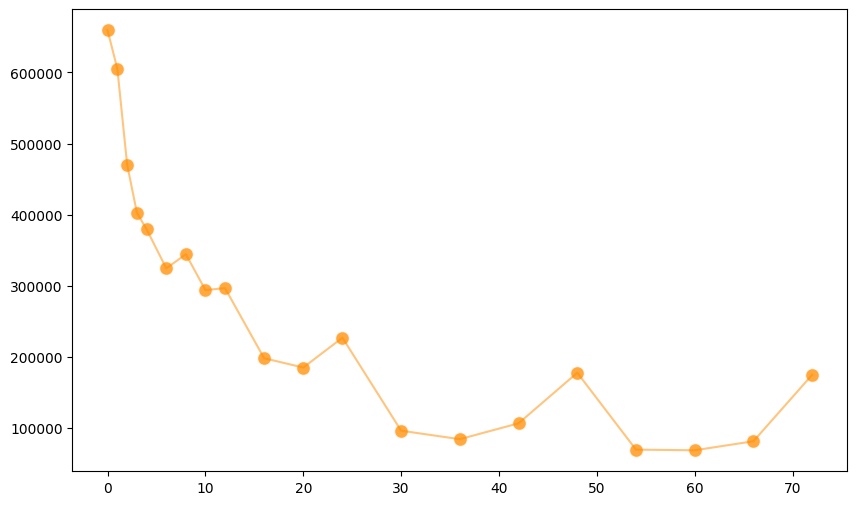

In [3]:
for h_min in [150, 200]:
    det_model = DeterministicModel.load('Deterministic_model_22_23_hmin{}'.format(h_min),DeterministicModel)
    results_det = det_model.load_results(ORIGINAL)
    results_det_total_objective = results_det.get_total_objective()
    objectives_det = []
    for lag in lags:
        results_mpc_det = det_model.MPC_adjustment_with_naive_balancing_forecasts(results_det, lag)
        objectives_det.append(results_mpc_det.get_total_objective() - results_det_total_objective)
        print('Lag {} done'.format(lag))
        
    #Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(lags, objectives_det, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='MPC adjustment objective')
    plt.plot(lags, objectives_det, linestyle='-', color='darkorange', alpha=0.5)
    plt.axhline(y=best_adj_det.get_total_objective() - results_det.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
    plt.axhline(y=rule_based_adj_det.get_total_objective() - results_det.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
    plt.xlabel('Lag', fontsize=12)
    plt.ylabel('Objective', fontsize=12)
    plt.title(f'MPC adjustment on deterministic model for naive balancing prices forecast (2022-23, Hmin = {h_min})', fontsize=14, pad=20)
    plt.xticks([6*i for i in range(13)], fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.6)
    # Add a dashed line at the objective of deterministic model without balancing prices
    
    plt.tight_layout()
    plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
    plt.savefig('../plots/2022_2023/mpc_adjustment_det_lags_hmin{}.png'.format(h_min))
    plt.show()

In [4]:
objectives_hapd = []
for lag in lags:
    results_mpc_hapd = hapd_model.MPC_adjustment_with_naive_balancing_forecasts(results_hapd, lag)
    objectives_hapd.append(results_mpc_hapd.get_total_objective() - results_hapd.get_total_objective())
    print('Lag {} done'.format(lag))
    
np.save('../results/mpc_naive_balancing_forecasts/mpc_adjustment_hapd_lags_hmin_50_22_23.npy', objectives_hapd)

Lag 0 done
Lag 1 done
Lag 2 done
Lag 3 done
Lag 4 done
Lag 6 done
Lag 8 done
Lag 10 done
Lag 12 done
Lag 16 done
Lag 20 done
Lag 24 done
Lag 30 done
Lag 36 done
Lag 42 done
Lag 48 done
Lag 54 done
Lag 60 done
Lag 66 done
Lag 72 done


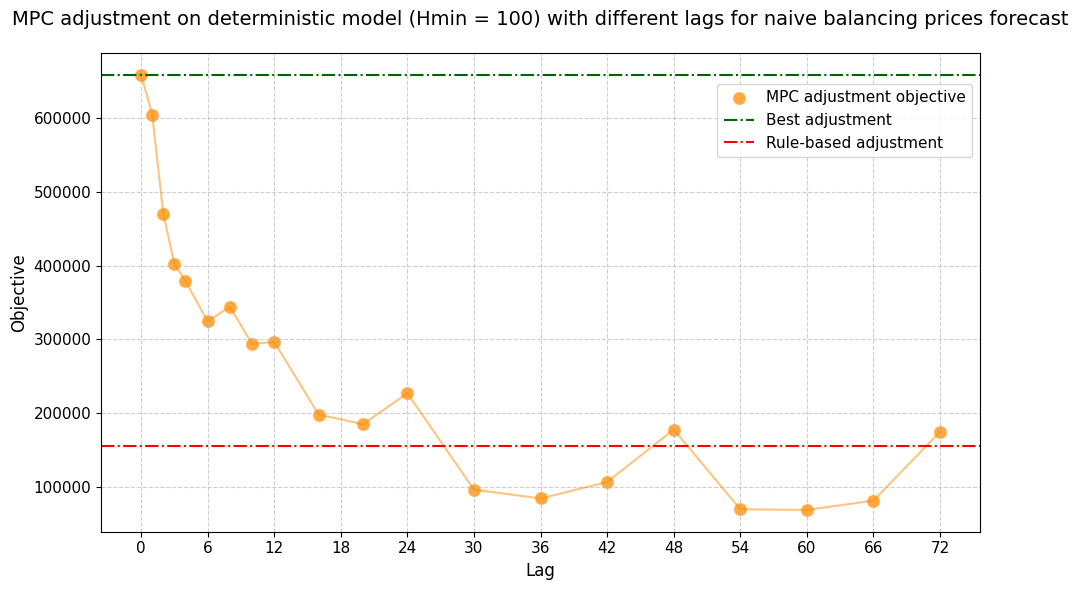

In [5]:
best_adj_det = det_model.best_adjustment(results_det)
rule_based_adj_det = det_model.rule_based_adjustment(results_det)
#Plot results
plt.figure(figsize=(10, 6))
plt.scatter(lags, objectives_det, color='darkorange', edgecolors='w', s=100, alpha=0.75, label='MPC adjustment objective')
plt.plot(lags, objectives_det, linestyle='-', color='darkorange', alpha=0.5)
plt.axhline(y=best_adj_det.get_total_objective() - results_det.get_total_objective(), color='darkgreen', linestyle='-.', label='Best adjustment')
plt.axhline(y=rule_based_adj_det.get_total_objective() - results_det.get_total_objective(), color='red', linestyle='-.', label='Rule-based adjustment')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('MPC adjustment on deterministic model (Hmin = 100) with different lags for naive balancing prices forecast', fontsize=14, pad=20)
plt.xticks([6*i for i in range(13)], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
# Add a dashed line at the objective of deterministic model without balancing prices

plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
# plt.savefig('../results/mpc_naive_balancing_forecasts/mpc_adjustment_det_lags_hmin_50.png')
plt.show()

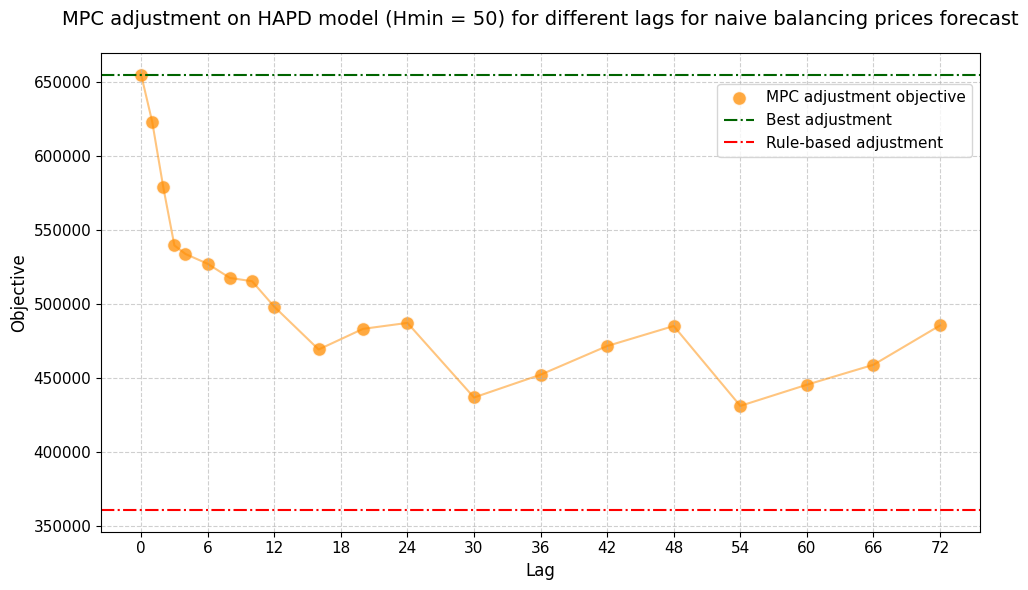

In [7]:
#Plot results
plt.figure(figsize=(10, 6))
plt.scatter(lags, objectives_hapd, color='darkorange', edgecolors='w', s=100, alpha=0.75,
            label='MPC adjustment objective')
plt.plot(lags, objectives_hapd, linestyle='-', color='darkorange', alpha=0.5)
plt.axhline(y=best_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='darkgreen', linestyle='-.',
            label='Best adjustment')
plt.axhline(y=rule_based_adj_hapd.get_total_objective() - results_hapd.get_total_objective(), color='red', linestyle='-.',
            label='Rule-based adjustment')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Objective', fontsize=12)
plt.title('MPC adjustment on HAPD model (Hmin = 50) for different lags for naive balancing prices forecast', fontsize=14, pad=20)
plt.xticks([6*i for i in range(13)], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1, 0.95))
plt.savefig('../results/mpc_naive_balancing_forecasts/mpc_adjustment_hapd_lags_hmin_50.png')
plt.show()